# Bibliotecas

In [25]:
from bcb import sgs
import plotnine as p9
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt 

In [3]:
tabela = sgs.get(codes = {"ipca": 433}, 
                          start = "2000-01-01", 
                          end = "2024-05-01"
                 ).dropna()
tabela

,ipca
Date,
2000-01-01,0.62
2000-02-01,0.13
2000-03-01,0.22
2000-04-01,0.42
2000-05-01,0.01
...,...
2023-12-01,0.56
2024-01-01,0.42
2024-02-01,0.83


# Gráfico de Linha

In [17]:
tabela_ts = tabela.assign(
    date = lambda x: pd.to_datetime(x.index, utc = True),
    mes = lambda x: x.date.dt.month,
    ano = lambda x: x.date.dt.year
    )
tabela_ts

,ipca,date,mes,ano
Date,,,,
2000-01-01,0.62,2000-01-01 00:00:00+00:00,1,2000
2000-02-01,0.13,2000-02-01 00:00:00+00:00,2,2000
2000-03-01,0.22,2000-03-01 00:00:00+00:00,3,2000
2000-04-01,0.42,2000-04-01 00:00:00+00:00,4,2000
2000-05-01,0.01,2000-05-01 00:00:00+00:00,5,2000
...,...,...,...,...
2023-12-01,0.56,2023-12-01 00:00:00+00:00,12,2023
2024-01-01,0.42,2024-01-01 00:00:00+00:00,1,2024
2024-02-01,0.83,2024-02-01 00:00:00+00:00,2,2024


C:\Users\pedro\AppData\Local\Temp\ipykernel_21204\2396322398.py:1: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


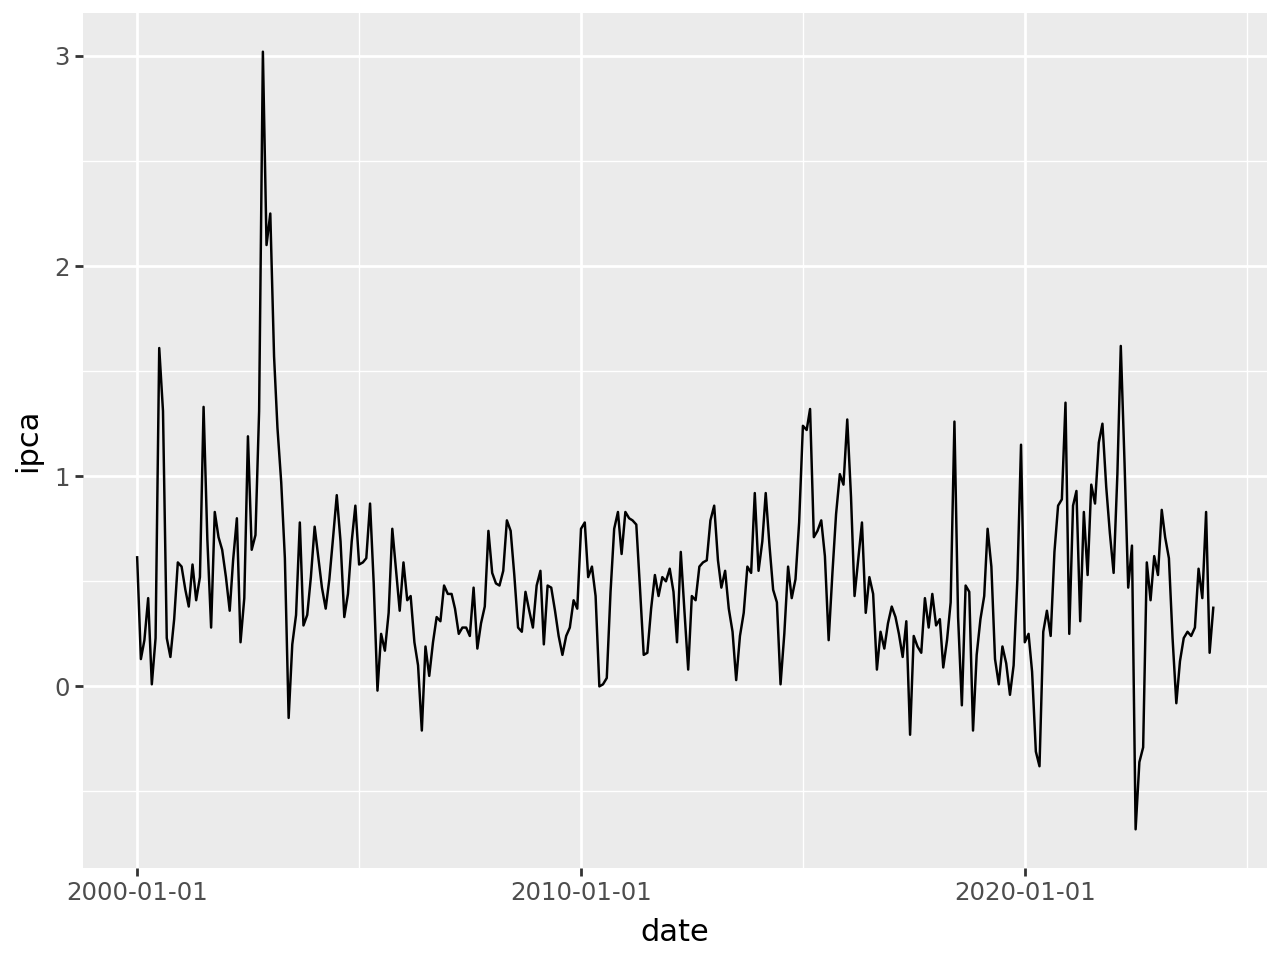

In [18]:
print(
    p9.ggplot(tabela_ts)+
    p9.aes(x="date", y="ipca") +
    p9.geom_line()
)

C:\Users\pedro\AppData\Local\Temp\ipykernel_21204\2982901536.py:1: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


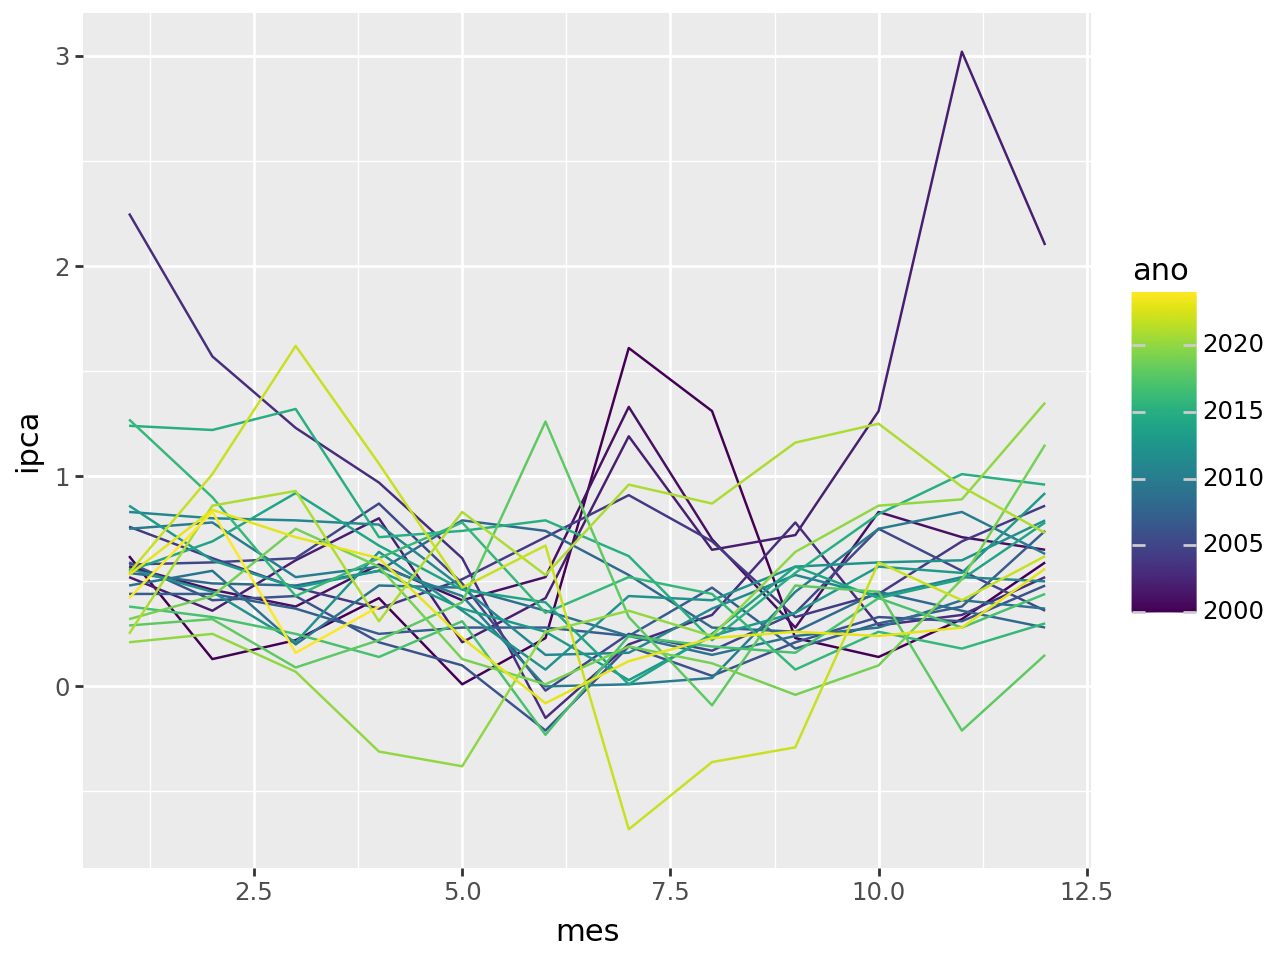

In [21]:
print(
    p9.ggplot(tabela_ts)+
    p9.aes(x="mes", y="ipca", color = "ano", group ="ano") +
    p9.geom_line()
)

# Gráfico de Decomposição

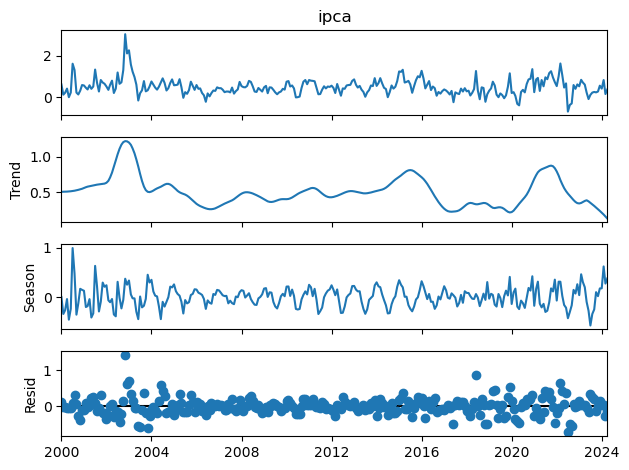

In [24]:
STL(tabela.ipca).fit().plot()

# Gráfico autocorrelação

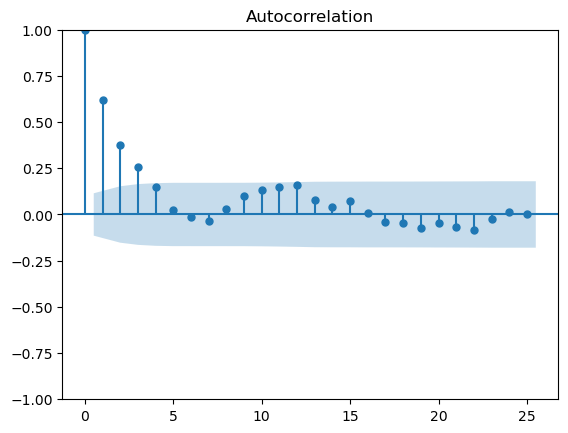

In [26]:
plot_acf(tabela.ipca)

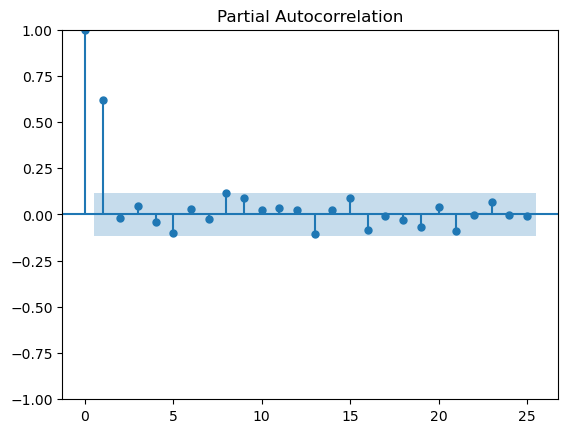

In [27]:
plot_pacf(tabela.ipca)